# Exploitation vs Exploration

In [2]:
# SOURCE - an example from https://github.com/fmfn/BayesianOptimization.git:
#   https://github.com/fmfn/BayesianOptimization/blob/master/examples/exploitation%20vs%20exploration.ipynb
# The Bayesian Optimization library can be installed with: 
#   pip install bayesian-optimization
# Or: 
#   git clone https://github.com/fmfn/BayesianOptimization.git
#   cd BayesianOptimization
#   python setup.py install
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from bayes_opt import BayesianOptimization, Observer, Events

# use sklearn's default parameters for theta and random_start
gp_params = {"alpha": 1e-5, "n_restarts_optimizer": 2}

# Target function

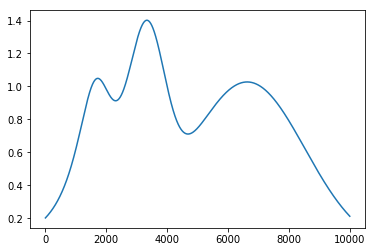

In [3]:
np.random.seed(42)
xs = np.linspace(-2, 10, 10000)
f = np.exp(-(xs - 2)**2) + np.exp(-(xs - 6)**2/10) + 1/ (xs**2 + 1)

plt.plot(f)
plt.show()

## Utility function for plotting

In [4]:
def plot_bo(f, bo):
    xs = [x["x"] for x in bo.res["all"]["params"]]
    ys = bo.res["all"]["values"]

    mean, sigma = bo.gp.predict(np.arange(len(f)).reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(f)
    plt.plot(np.arange(len(f)), mean)
    plt.fill_between(np.arange(len(f)), mean+sigma, mean-sigma, alpha=0.1)
    plt.scatter(bo.X.flatten(), bo.Y, c="red", s=50, zorder=10)
    plt.xlim(0, len(f))
    plt.ylim(f.min()-0.1*(f.max()-f.min()), f.max()+0.1*(f.max()-f.min()))
    plt.show()

# Acquisition Function "Upper Confidence Bound"

## Prefer exploitation (kappa=1.0)

Note that most points are around the peak(s).

Initialization completed
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization finished, maximum value at:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.398696238925308, 'max_params': {'x': 3283.1161985556523}}
Optimization step finished, current max:  {'max_val': 1.398696238925308, 'max_params': {'x': 3283.1161985556523}}
Optimization step finished, current max:  {'max_val': 1.4018624

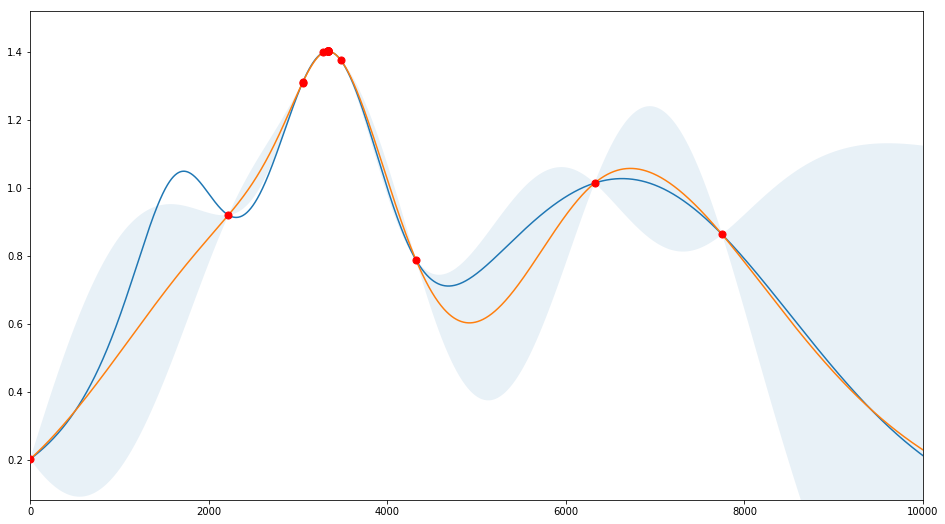

In [5]:

observer = Observer()

bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.register(Events.INIT_DONE, observer)
bo.register(Events.FIT_DONE, observer)
bo.register(Events.FIT_STEP_DONE, observer)

bo.maximize(init_points=2, n_iter=3, acq="ucb", kappa=1, **gp_params)
bo.maximize(init_points=2, n_iter=25, acq="ucb", kappa=1, **gp_params)

plot_bo(f, bo)

## Prefer exploration (kappa=10)

Note that the points are more spread out across the whole range.

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.48465 | 8950.8725 | 
    2 | 00m00s |    0.87163 | 5513.9725 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m00s |    0.87114 | 5511.6523 | 
    4 | 00m00s |    0.20166 |    0.0000 | 
    5 | 00m00s |    1.15297 | 2829.0842 | 
    6 | 00m01s |    0.21180 | 9999.0000 | 
    7 | 00m00s |    0.94348 | 4070.7656 | 
    8 | 00m00s |    0.98824 | 7158.7597 | 
    9 | 00m01s |    0.98075 | 1481.5129 | 
   10 | 00m01s |    0.92160 | 2209.3702 | 
   11 | 00m01s |    0.79605 | 7983.3918 | 
   12 | 00m01s |    1.01380 | 6318.6992 | 
   13 | 00m01s |    0.47082 |  771.5466 | 
   14 | 00m01s |    1.38423 | 3453.7685 | 
   15 | 00m01s |    0.71923 | 4824.7533 | 
   16 | 00m01s |    1.37807 | 3194.6317 | 
   17 | 00m01s |    1.02557 | 6737.7040 | 
   18 | 00m01s |    1.40187 | 3329.7804 | 
   19 | 00m01s |   

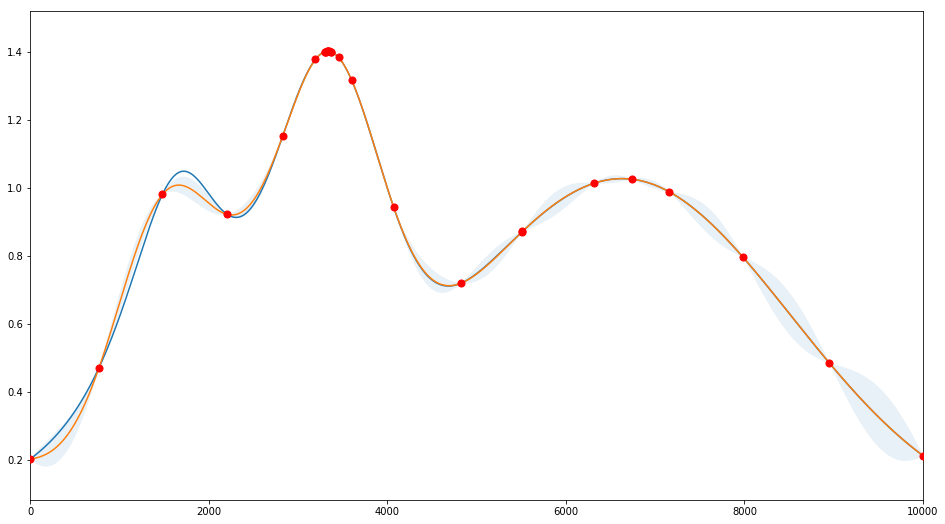

In [6]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="ucb", kappa=10, **gp_params)

plot_bo(f, bo)

# Acquisition Function "Expected Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.99560 | 1964.3108 | 
    2 | 00m00s |    0.84066 | 5389.1729 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m00s |    0.99524 | 1965.0567 | 
    4 | 00m00s |    0.20166 |    0.0000 | 
    5 | 00m00s |    1.40182 | 3326.8446 | 
    6 | 00m00s |    0.21199 | 9998.9269 | 
    7 | 00m00s |    1.25358 | 3694.5533 | 
    8 | 00m00s |    1.28282 | 3008.4675 | 
    9 | 00m00s |    0.98514 | 7179.6991 | 
   10 | 00m00s |    0.69011 | 8319.4574 | 
   11 | 00m00s |    1.01465 | 6328.5103 | 
   12 | 00m00s |    0.73035 | 1143.4728 | 
   13 | 00m00s |    1.40133 | 3355.5087 | 
   14 | 00m00s |    1.40185 | 3340.3431 | 
   15 | 00m00s |    1.40185 | 3340.3752 | 
   16 | 00m00s |    1.40183 | 3341.7796 | 
   17 | 00m00s |    1.40186 | 3328.0304 | 
   18 | 00m00s |    1.40128 | 3356.3234 | 
   19 | 00m00s |   

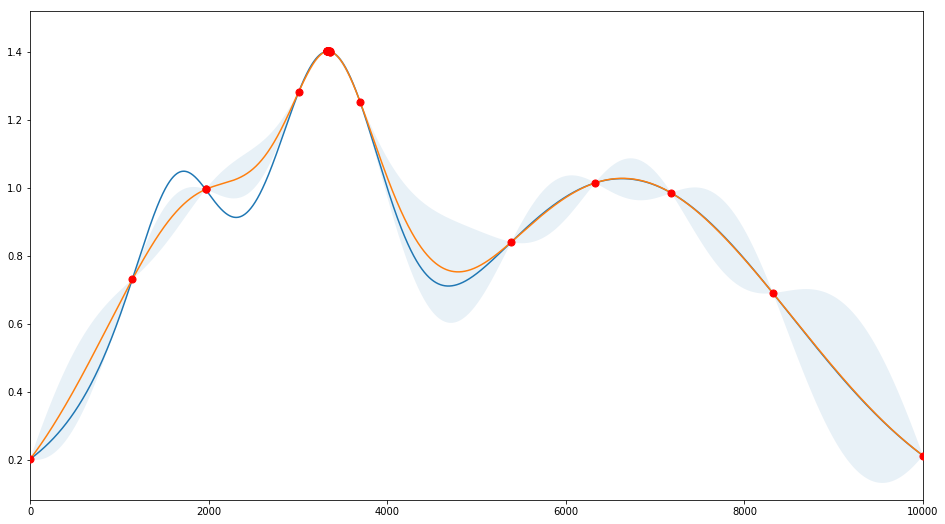

In [7]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="ei", xi=1e-4, **gp_params)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.36456 | 9355.0755 | 
    2 | 00m00s |    0.92999 | 7476.2325 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m00s |    0.71601 | 4584.2077 | 
    4 | 00m00s |    0.20166 |    0.1233 | 
    5 | 00m00s |    0.92977 | 7477.0895 | 
    6 | 00m00s |    1.01818 | 6374.2557 | 
    7 | 00m00s |    0.91679 | 2242.1500 | 
    8 | 00m00s |    1.33698 | 3099.0798 | 
    9 | 00m00s |    1.35939 | 3520.5769 | 
   10 | 00m00s |    0.21199 | 9998.9382 | 
   11 | 00m00s |    0.72076 | 1131.1977 | 
   12 | 00m00s |    0.90649 | 5660.9800 | 
   13 | 00m00s |    0.70828 | 8263.0961 | 
   14 | 00m00s |    1.12672 | 3850.4474 | 
   15 | 00m00s |    1.01609 | 6910.3226 | 
   16 | 00m00s |    1.40150 | 3316.2697 | 
   17 | 00m00s |    1.04684 | 1677.2946 | 
   18 | 00m00s |    0.78404 | 5163.9270 | 
   19 | 00m00s |   

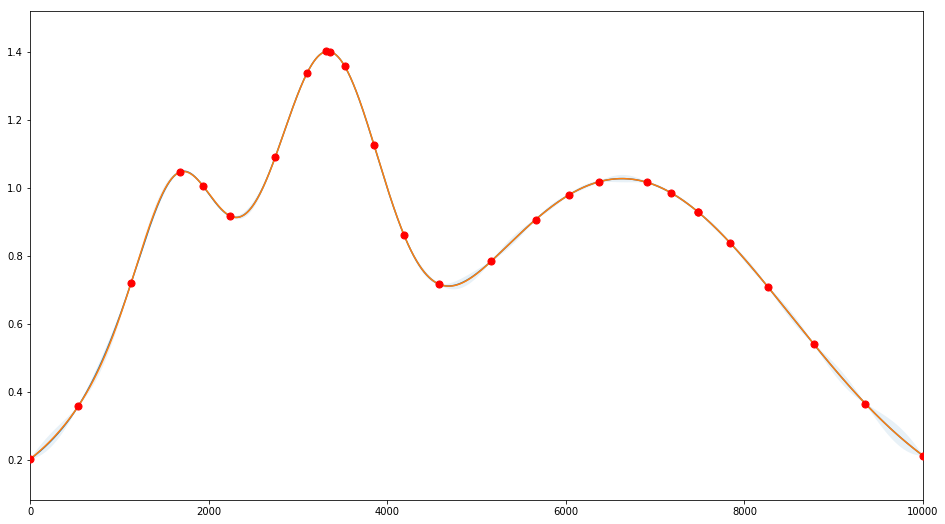

In [8]:
bo = BayesianOptimization(f=lambda x: f[int(x)], pbounds={"x": (0, len(f)-1)}, verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="ei", xi=0.1, **gp_params)

plot_bo(f, bo)

# Acquisition Function "Probability of Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.30332 | 9588.9398 | 
    2 | 00m00s |    0.86843 | 5500.7869 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m01s |    0.83077 | 5350.3639 | 
    4 | 00m01s |    0.90489 | 5653.1441 | 
    5 | 00m00s |    0.93886 | 5810.9084 | 
    6 | 00m00s |    0.93886 | 5810.8971 | 
    7 | 00m00s |    0.96707 | 5960.7530 | 
    8 | 00m00s |    0.99513 | 6145.0225 | 
    9 | 00m00s |    1.01423 | 6323.4067 | 
   10 | 00m00s |    1.02396 | 6476.0161 | 
   11 | 00m00s |    1.02697 | 6586.1302 | 
   12 | 00m00s |    1.02722 | 6633.7438 | 
   13 | 00m00s |    1.02721 | 6638.6280 | 
   14 | 00m00s |    1.02721 | 6638.9043 | 
   15 | 00m00s |    1.02721 | 6638.9476 | 
   16 | 00m00s |    1.02721 | 6638.9041 | 
   17 | 00m00s |    1.02721 | 6638.9552 | 
   18 | 00m00s |    1.02721 | 6638.9572 | 
   19 | 00m00s |   

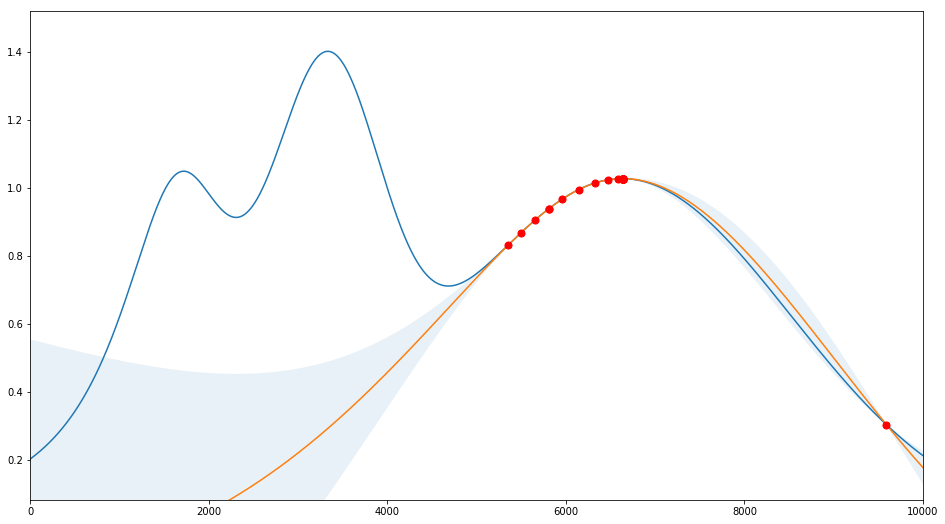

In [9]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="poi", xi=1e-4, **gp_params)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.88299 | 7673.6560 | 
    2 | 00m00s |    0.90562 | 7582.2307 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m00s |    0.90562 | 7582.5979 | 
    4 | 00m02s |    1.02701 | 6590.5911 | 
    5 | 00m00s |    1.38650 | 3445.5541 | 
    6 | 00m00s |    0.48817 |  801.9670 | 
    7 | 00m00s |    0.85034 | 4204.6818 | 
    8 | 00m00s |    1.28870 | 3017.1821 | 
    9 | 00m00s |    0.21180 | 9999.0000 | 
   10 | 00m00s |    0.20166 |    0.0190 | 
   11 | 00m00s |    0.96165 | 2060.1932 | 
   12 | 00m00s |    0.91281 | 5688.2823 | 
   13 | 00m00s |    0.50138 | 8897.0681 | 
   14 | 00m00s |    0.75416 | 5032.0611 | 
   15 | 00m00s |    0.99500 | 1508.4068 | 
   16 | 00m00s |    1.39654 | 3268.5333 | 
   17 | 00m00s |    0.99805 | 6168.7476 | 
   18 | 00m00s |    0.68619 | 8331.1528 | 
   19 | 00m00s |   

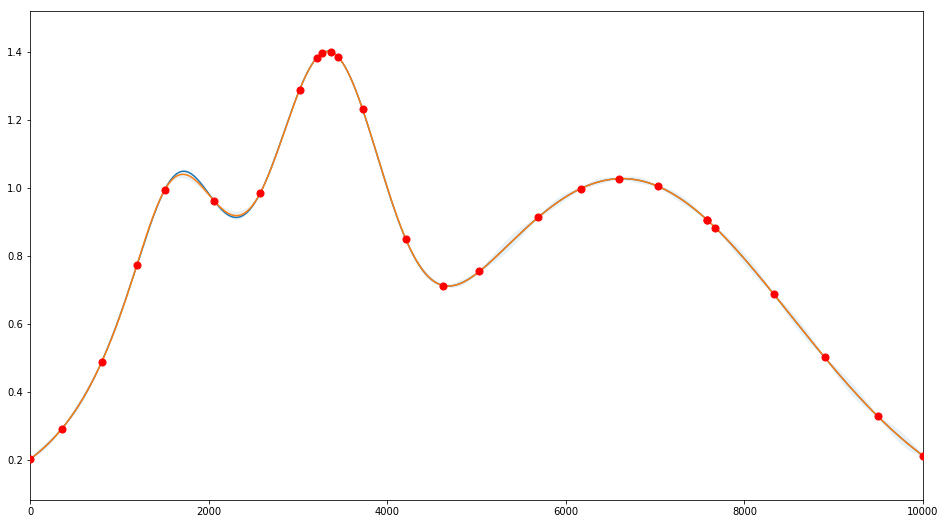

In [10]:
bo = BayesianOptimization(f=lambda x: f[int(x)], pbounds={"x": (0, len(f)-1)}, verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="poi", xi=0.1, **gp_params)

plot_bo(f, bo)